# EDA
- `exploratory data analysis` -> process of understanding the data,visualizing it and preprocessing to identify the patterns,outliers,missing values and the relationships .
 

## Key Steps In EDA:

1. `Data Loading` : csv/excel/database 
2. `Data Inspection` : checking the Shape,datatypes,head(),tail()
3. `Summary Statistics` : mean,median,mode,std,describe()
4. `Handling Missing Values` : fill,drop,interpolate
5. `Outliers Detection` : Boxplot,IQR method,Z_score
6. `Data Visualization` : Histogram, Scatterplot , Heatmap, Pairplot
7. `Correlation Analysis` : Variables ke beech relation (Pearson/Spearman)
8. `Feature Engineering` : New Columns create karna.


# Important Functions:

- `df.info()`-> checking the datatypes and null values
- `df.describe()`-> summary statistics
- `df.isnull().sum()`->missing values count
- `df.corr()` -> correlation matrix
- `sns.heatmap(df.corr(),annot=True)` -> correlation Visualization
- `sns.boxplot(x=col)` -> outlier detection
- `sns.histplot(df[col])` -> distribution check

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy import stats

In [7]:
data =pd.read_csv('test.csv')

In [8]:
df=pd.DataFrame(data)


In [9]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# INFO

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


# Describe

In [12]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<Axes: ylabel='Frequency'>

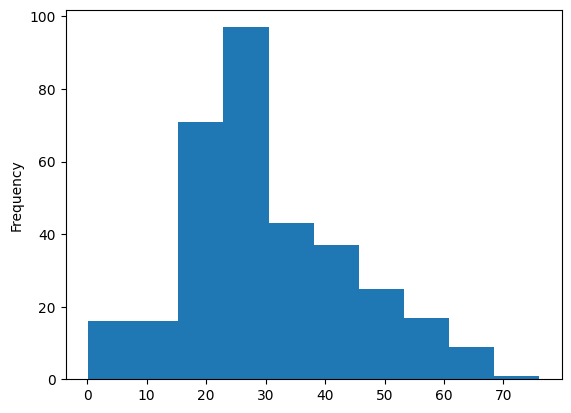

In [14]:
df['Age'].plot(kind='hist')

# Checking the missing values

In [15]:
df.isnull()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,True,False,False,False,False,True,False


In [16]:
df.isnull().count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            418
SibSp          418
Parch          418
Ticket         418
Fare           418
Cabin          418
Embarked       418
dtype: int64

# Handling missing values

In [23]:

df['Age'].fillna(df['Age'].median(),inplace=True)




In [24]:
df['Fare'].fillna(df['Fare'].mean(),inplace=True)

C:\Users\MR.UNKNOWN\AppData\Local\Temp\ipykernel_8608\1005235208.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(df['Fare'].mean(),inplace=True)


In [25]:
df['Age'].isnull().sum()

np.int64(0)

In [26]:
df['Fare'].isnull().sum()

np.int64(0)

# Univariate Analysis 

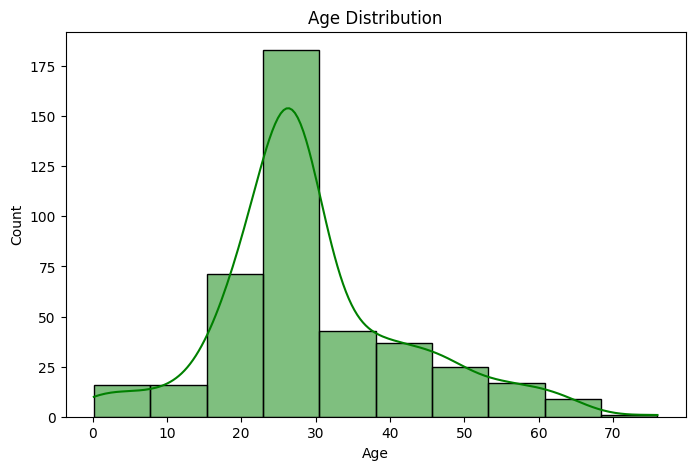

In [28]:
# histogram for the numerical column

plt.figure(figsize=(8,5))
sns.histplot(df['Age'],bins=10,kde=True,color='green')
plt.title("Age Distribution")
plt.show()

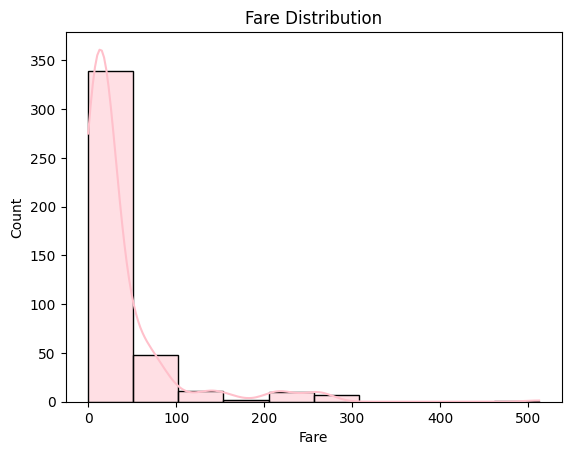

In [30]:
plt.Figure(figsize=(8,5))
sns.histplot(df['Fare'],bins=10,kde=True,color='pink')
plt.title("Fare Distribution")
plt.show()

In [34]:
df['Fare'].skew()

np.float64(3.6915998329393105)

C:\Users\MR.UNKNOWN\AppData\Local\Temp\ipykernel_8608\1245030240.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex',data=df,palette='Set2')


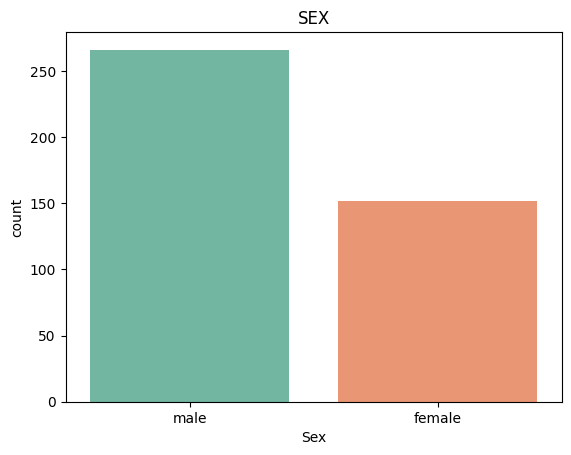

In [36]:
# countplot for categorical column

plt.Figure(figsize=(8,5))
sns.countplot(x='Sex',data=df,palette='Set2')
plt.title("SEX")
plt.show()

# Bivariate Analysis

C:\Users\MR.UNKNOWN\AppData\Local\Temp\ipykernel_8608\3482965620.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sex",y="Age",data=df, palette="pastel")


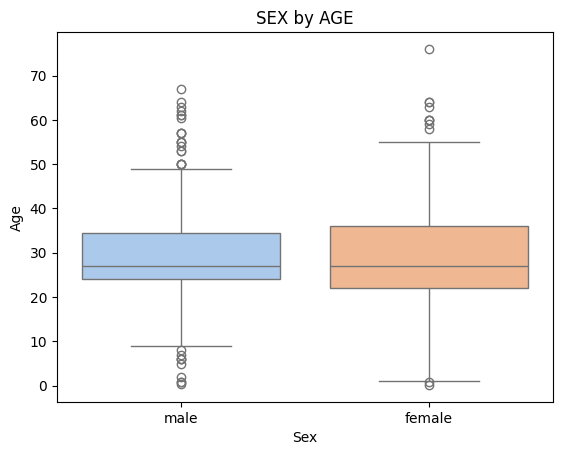

In [37]:
# age and sex

plt.Figure(figsize=(8,5))
sns.boxplot(x="Sex",y="Age",data=df, palette="pastel")
plt.title("SEX by AGE")
plt.show()

# Correlation Analysis

In [38]:
numeric_df=df[["Age","Fare"]]
corr=numeric_df.corr()
print(corr)

           Age      Fare
Age   1.000000  0.344627
Fare  0.344627  1.000000


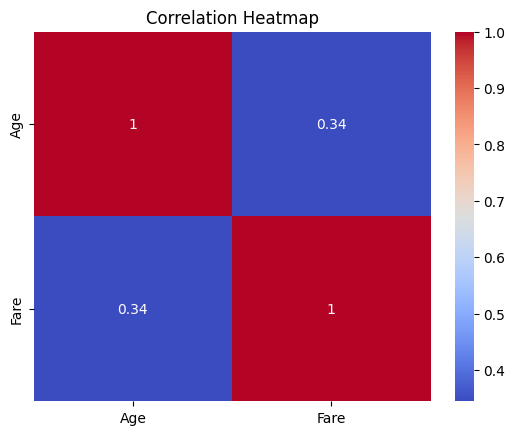

In [39]:
plt.Figure(figsize=(6,5))
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Outlier Detection

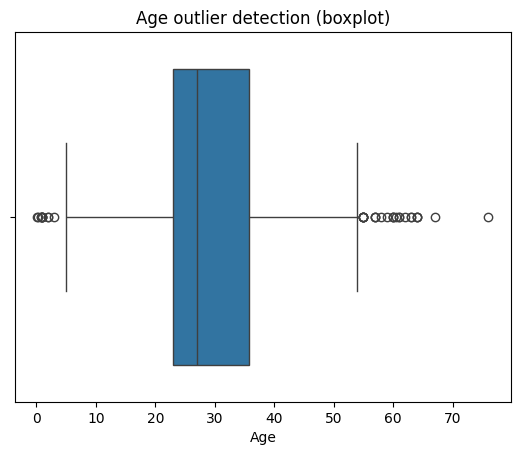


=== Outliers Detected Using Z-score ===
    PassengerId  Pclass                                               Name  \
96          988       1  Cavendish, Mrs. Tyrell William (Julia Florence...   

       Sex   Age  SibSp  Parch Ticket   Fare Cabin Embarked  
96  female  76.0      1      0  19877  78.85   C46        S  

=== Outliers Detected Using IQR Method ===
     PassengerId  Pclass                                               Name  \
2            894       2                          Myles, Mr. Thomas Francis   
13           905       2                               Howard, Mr. Benjamin   
20           912       1                             Rothschild, Mr. Martin   
48           940       1    Bucknell, Mrs. William Robert (Emma Eliza Ward)   
69           961       1                Fortune, Mrs. Mark (Mary McDougald)   
77           969       1  Cornell, Mrs. Robert Clifford (Malvina Helen L...   
81           973       1                                 Straus, Mr. Isidor   
89

In [41]:
## boxplot

plt.Figure(figsize=(10,10))
sns.boxplot(x=df['Age'])
plt.title("Age outlier detection (boxplot)")
plt.show()


# Z-Score

z_scores = np.abs(stats.zscore(df['Age']))
outliers = df[z_scores > 3]
print("\n=== Outliers Detected Using Z-score ===")
print(outliers)

# Method 3: IQR Method
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
outlier_IQR = df[(df['Age'] < (Q1 - 1.5*IQR)) | (df['Age'] > (Q3 + 1.5*IQR))]
print("\n=== Outliers Detected Using IQR Method ===")
print(outlier_IQR)
